# Análisis Exploratorio de datos. Ejemplo 1

In [1]:
  # Importo las librerías básicas:

  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  import numpy as np
  from scipy.stats import norm
  from sklearn.preprocessing import StandardScaler # Transformacion, Normalizacion
  from scipy import stats

  import warnings
  warnings.filterwarnings('ignore') # Para evitar los molestos avisos
  %matplotlib inline

In [ ]:
# datos del caso
from google.colab import drive
drive.mount('/gdrive')

df_train = pd.read_csv("/gdrive/My Drive/Colab Notebooks/Predic_Prestamo.csv", sep=",", encoding='latin-1')
print(df_train.head(6))
print(df_train.tail(6))

Mounted at /gdrive
    Loan_ID Genero Es_Casado Num_Hijos Nivel_Educativo Tiene_Empleo  \
0  LP001002   Male        No         0        Graduate           No   
1  LP001003   Male       Yes         1        Graduate           No   
2  LP001005   Male       Yes         0        Graduate          Yes   
3  LP001006   Male       Yes         0    Not Graduate           No   
4  LP001008   Male        No         0        Graduate           No   
5  LP001011   Male       Yes         2        Graduate          Yes   

   Ing_Depen  Ing_Indepen  Mto_Prestamo  Termino_Prestamo  Tiene_Hist_Credito  \
0       5849          0.0           NaN             360.0                 1.0   
1       4583       1508.0         128.0             360.0                 1.0   
2       3000          0.0          66.0             360.0                 1.0   
3       2583       2358.0         120.0             360.0                 1.0   
4       6000          0.0         141.0             360.0                 1.0 

In [2]:
pwd


'C:\\Users\\Alexander\\Desktop\\Python'

In [3]:
df_train = pd.read_csv("Data1/Predic_Prestamo.csv", sep=",", encoding='latin-1')
print(df_train.head(6))
print(df_train.tail(6))

    Loan_ID Genero Es_Casado Num_Hijos Nivel_Educativo Tiene_Empleo  \
0  LP001002   Male        No         0        Graduate           No   
1  LP001003   Male       Yes         1        Graduate           No   
2  LP001005   Male       Yes         0        Graduate          Yes   
3  LP001006   Male       Yes         0    Not Graduate           No   
4  LP001008   Male        No         0        Graduate           No   
5  LP001011   Male       Yes         2        Graduate          Yes   

   Ing_Depen  Ing_Indepen  Mto_Prestamo  Termino_Prestamo  Tiene_Hist_Credito  \
0       5849          0.0           NaN             360.0                 1.0   
1       4583       1508.0         128.0             360.0                 1.0   
2       3000          0.0          66.0             360.0                 1.0   
3       2583       2358.0         120.0             360.0                 1.0   
4       6000          0.0         141.0             360.0                 1.0   
5       5417    

## ETAPA 1: Entendimiento contextual del proyecto a desarrollar


En esta etapa debemos plantear el contexto del problema, plantear los objetivos del proyecto y definir las variables y tipos de variables a utilizar

## ETAPA 2: Preparación y valor agregado de los datos

En esta etapa revisaremos la data y la estructura de la información

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Genero              601 non-null    object 
 2   Es_Casado           611 non-null    object 
 3   Num_Hijos           599 non-null    object 
 4   Nivel_Educativo     614 non-null    object 
 5   Tiene_Empleo        582 non-null    object 
 6   Ing_Depen           614 non-null    int64  
 7   Ing_Indepen         614 non-null    float64
 8   Mto_Prestamo        592 non-null    float64
 9   Termino_Prestamo    600 non-null    float64
 10  Tiene_Hist_Credito  564 non-null    float64
 11  Area_Residencia     614 non-null    object 
 12  Estado_Prestamo     614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df_train.shape

(614, 13)

In [6]:
# Echo un vistazo las columnas:
df_train.columns

Index(['Loan_ID', 'Genero', 'Es_Casado', 'Num_Hijos', 'Nivel_Educativo',
       'Tiene_Empleo', 'Ing_Depen', 'Ing_Indepen', 'Mto_Prestamo',
       'Termino_Prestamo', 'Tiene_Hist_Credito', 'Area_Residencia',
       'Estado_Prestamo'],
      dtype='object')

In [7]:
# Echo un vistazo las filas:
df_train.index


RangeIndex(start=0, stop=614, step=1)

In [8]:
print(df_train[['Genero','Ing_Indepen','Area_Residencia','Tiene_Hist_Credito']])
print("--------------------------------------------------------")
print(df_train.iloc[[4,7,1,9],:])
print("--------------------------------------------------------")
print(df_train.iloc[:,[4,7,1,9]])

     Genero  Ing_Indepen Area_Residencia  Tiene_Hist_Credito
0      Male          0.0           Urban                 1.0
1      Male       1508.0           Rural                 1.0
2      Male          0.0           Urban                 1.0
3      Male       2358.0           Urban                 1.0
4      Male          0.0           Urban                 1.0
..      ...          ...             ...                 ...
609  Female          0.0           Rural                 1.0
610    Male          0.0           Rural                 1.0
611    Male        240.0           Urban                 1.0
612    Male          0.0           Urban                 1.0
613  Female          0.0       Semiurban                 0.0

[614 rows x 4 columns]
--------------------------------------------------------
    Loan_ID Genero Es_Casado Num_Hijos Nivel_Educativo Tiene_Empleo  \
4  LP001008   Male        No         0        Graduate           No   
7  LP001014   Male       Yes        3+       

In [9]:
# guardamos  un backup de la clase
df_train_bk = df_train.copy()

## ETAPA 3: Examen gráfico y descriptivo numérico

### Análisis univariado de un campo numerico: 'Ing_Indepen'

In [10]:
# Resumen de estadística descriptiva:

df_train['Ing_Indepen'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: Ing_Indepen, dtype: float64

In [11]:
df_train['Estado_Prestamo'].describe()

count     614
unique      2
top         Y
freq      422
Name: Estado_Prestamo, dtype: object

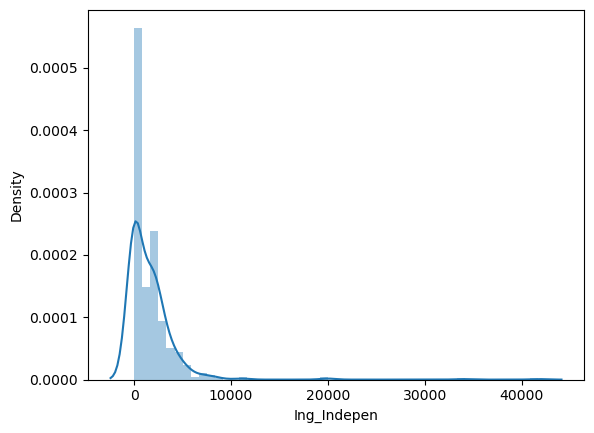

In [12]:
# Histograma con seaborn:

sns.distplot(df_train['Ing_Indepen'])
plt.show()

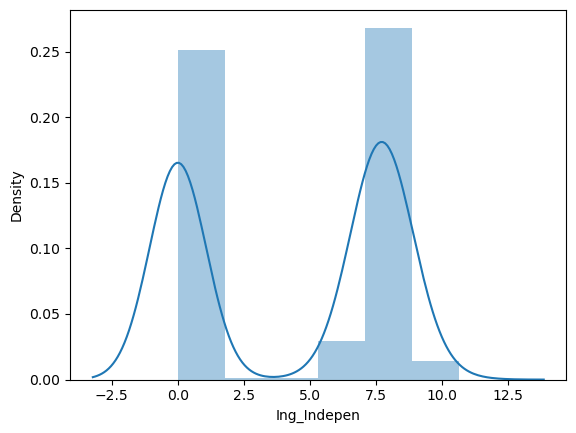

In [13]:
# Histograma con seaborn:

sns.distplot(np.log(df_train['Ing_Indepen']+1))
plt.show()

In [14]:
# entregar un metodo para calcular la moda

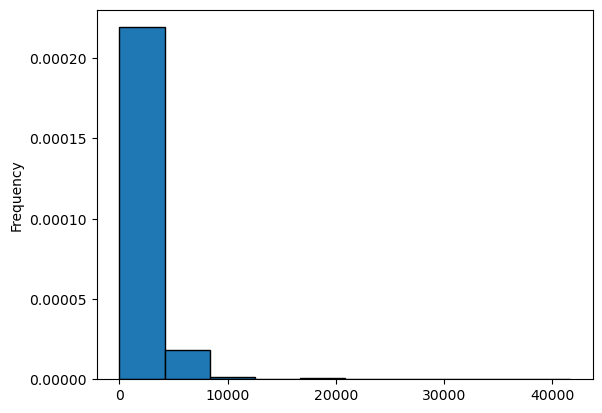

In [15]:
# Histograma con pandas:

df_train['Ing_Indepen'].plot(kind='hist',density=True, edgecolor='k')
plt.show()

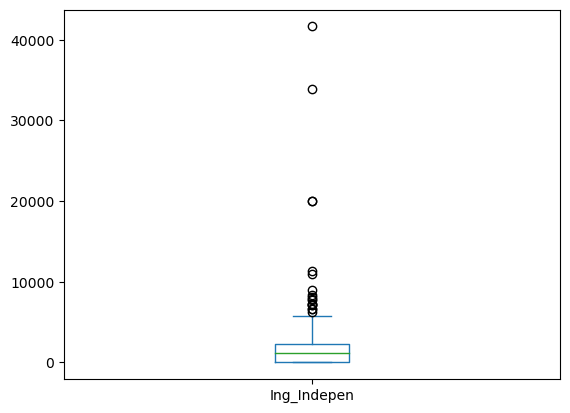

In [16]:
# Diagrama de cajas:

df_train['Ing_Indepen'].plot(kind='box')
plt.show()

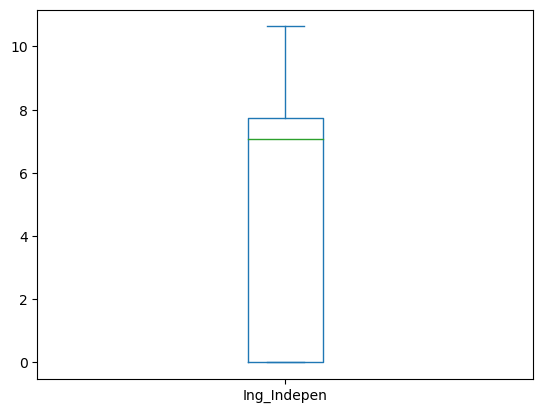

In [17]:
# Diagrama de cajas:

np.log(df_train['Ing_Indepen']+1).plot(kind='box')
plt.show()

In [18]:
np.log(df_train['Ing_Indepen']+1).describe()

count    614.000000
mean       4.290129
std        3.875873
min        0.000000
25%        0.000000
50%        7.081125
75%        7.739897
max       10.637489
Name: Ing_Indepen, dtype: float64

In [19]:
df_train['Ing_Indepen'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: Ing_Indepen, dtype: float64

A simple vista se puede apreciar:

 + Una desviación con respecto a la distribución normal.(una forma más simetrica).
 + Una asimetría positiva.
 + Algunos picos.
 + Varios posibles datos atípicos

In [20]:
# Rango intercuartílico y Coeficiente de variación: me permite cuantificar la amplitud de los datos

interquantile = lambda x: x.quantile(0.75) - x.quantile(0.25)
cv = lambda x: x.std()/x.mean()

f = {'Ing_Indepen' : [interquantile, cv]}
df_train.agg(f)

,Ing_Indepen
<lambda>,2297.250000
<lambda>,1.804938


Para una variable objetivo cualitativa

 * Hacer tablas de frecuencia (usando pandas group by)
 * Revisar la magnitud de la categoría de éxito  (si es muy pequeño deberiamos muestrear)
 * Graficos recomendados circulares y grafico de barras (barplot)

Si no hay varible objetivo, esta parte no se hace. Se realiza en este caso lo siguiente:

 * Revisión del problema y objetivos
 * Tipos de datos.
 * Revisión de nulos y atípicos


### Revisando las variables explicactivas cuantitativas:

In [21]:
df_train.describe()

,Ing_Depen,Ing_Indepen,Mto_Prestamo,Termino_Prestamo,Tiene_Hist_Credito
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [22]:
# extraemos las variables cuantitativas, quitando las variables Id
list(df_train.describe().columns)

['Ing_Depen',
 'Ing_Indepen',
 'Mto_Prestamo',
 'Termino_Prestamo',
 'Tiene_Hist_Credito']

In [23]:
# describe solo sirve en un dataframe para variables cuantitantiva
# si se usa en una cualitativa de manera directa, saca una tabla de frecuencia

lista_cuantitativas = list(df_train.describe().columns)
lista_cuantitativas

['Ing_Depen',
 'Ing_Indepen',
 'Mto_Prestamo',
 'Termino_Prestamo',
 'Tiene_Hist_Credito']

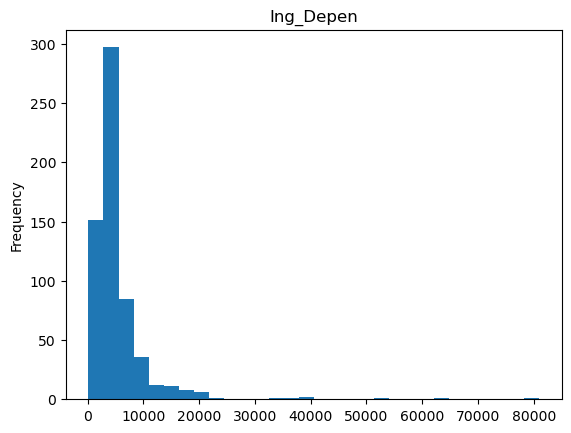

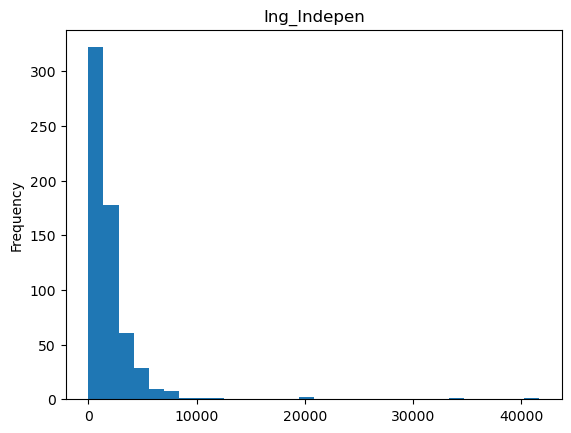

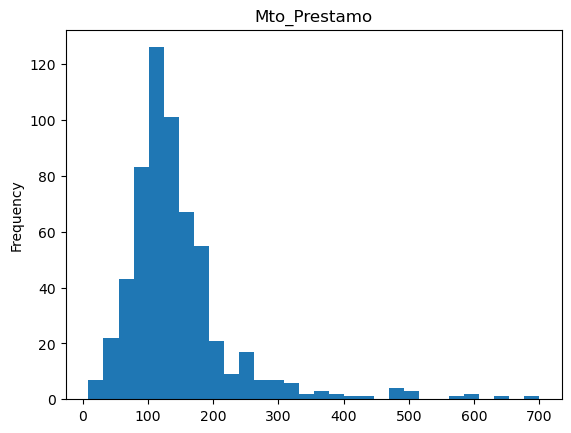

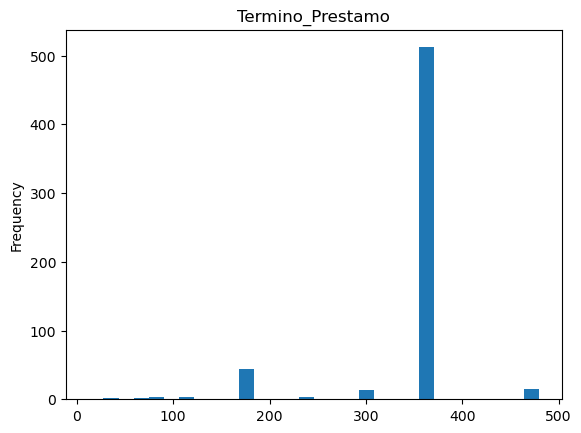

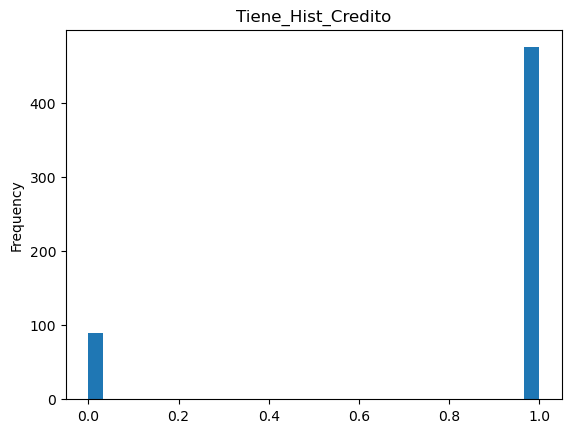

In [24]:
# realizamos histogramas para revisar la distribución de cada variable cuantitativa
for var in lista_cuantitativas:
    df_train[var].plot(kind='hist',title=var, bins=30)
    plt.show()

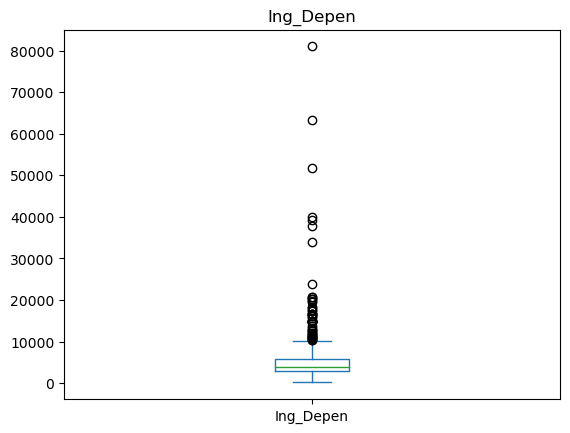

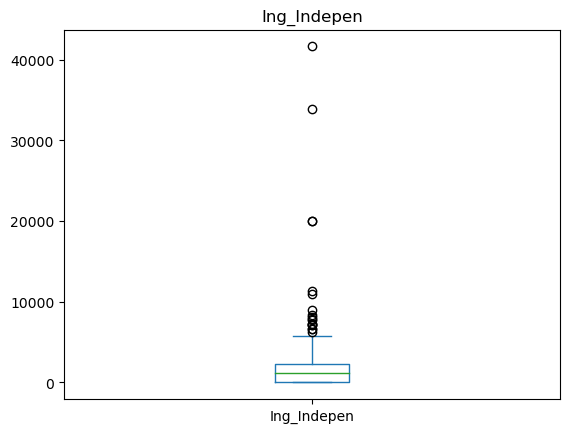

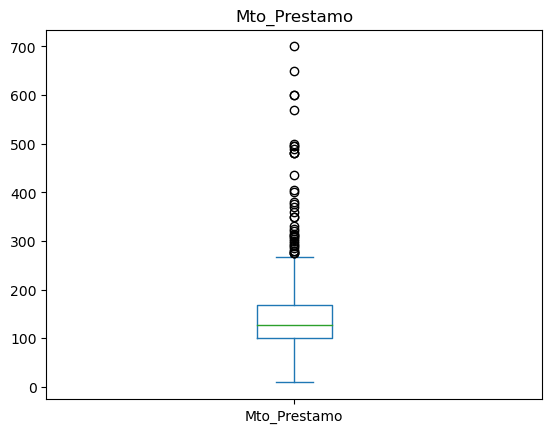

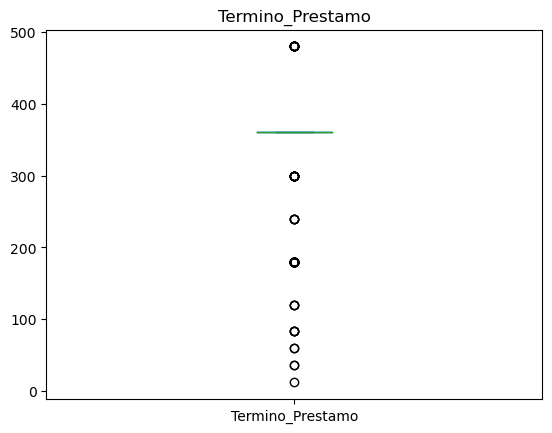

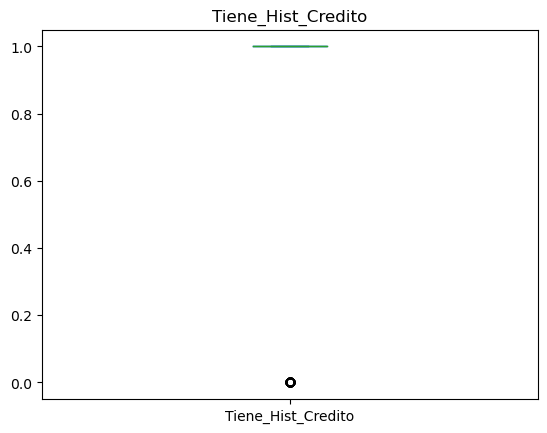

In [25]:
# realizamos diagramas de cajas para revisar la distribución de cada variable cuantitativa
for var in lista_cuantitativas:
     df_train[var].plot(kind='box', title=var)
     plt.show()

Con estos gráficos podemos revisar la distribución de las variables cuantitativas y posibles outliers por variables.



### Revisando las variables explicactivas cualitativas:

In [26]:
# extraemos las listas de cuantitativas
lista_cauntitativas = list(df_train.describe().columns)

#ahora en la base total quitamos estas variables, quedandonos con las cualitativas
lista_cualitativas = df_train.drop(columns = lista_cuantitativas).columns
lista_cualitativas

Index(['Loan_ID', 'Genero', 'Es_Casado', 'Num_Hijos', 'Nivel_Educativo',
       'Tiene_Empleo', 'Area_Residencia', 'Estado_Prestamo'],
      dtype='object')

In [27]:
df_train[lista_cualitativas]

,Loan_ID,Genero,Es_Casado,Num_Hijos,Nivel_Educativo,Tiene_Empleo,Area_Residencia,Estado_Prestamo
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


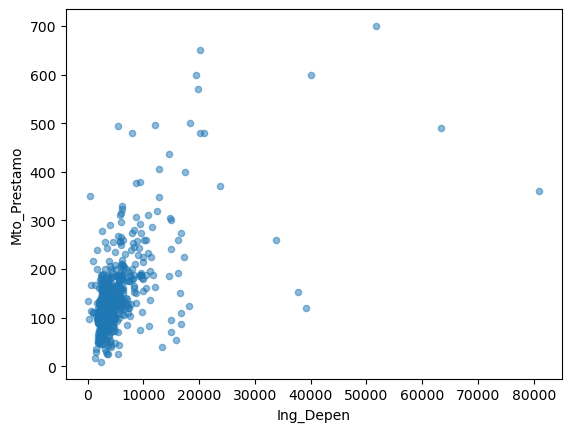

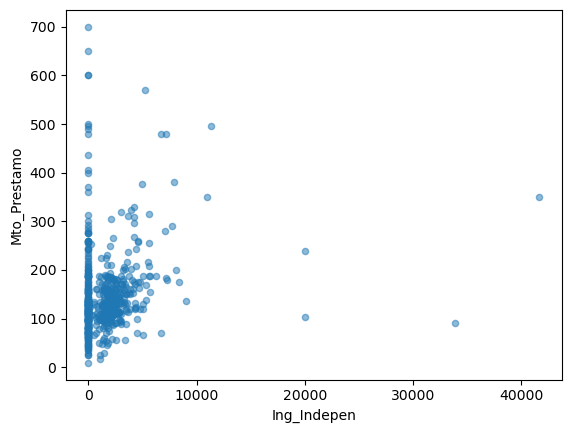

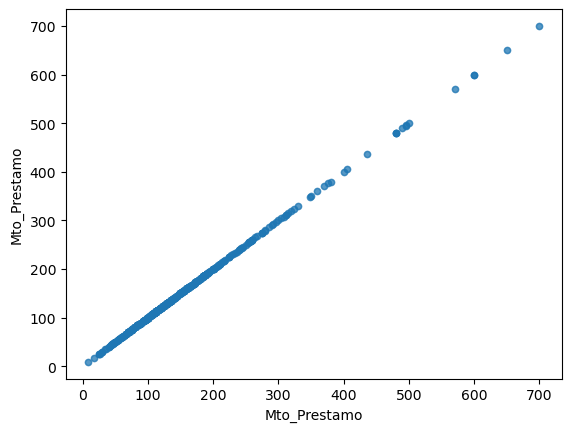

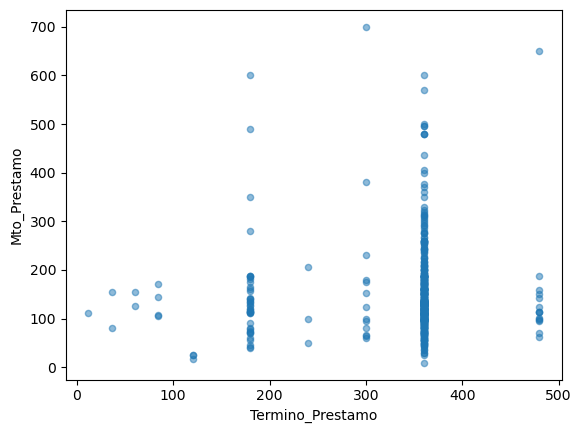

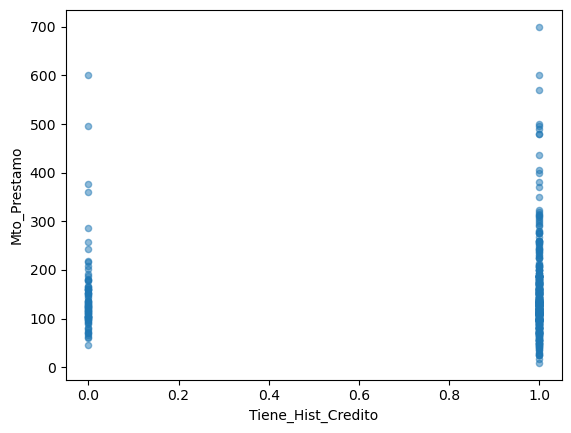

In [28]:
# Diagrama de dispersión cada variable con la variable objetivo (Estado_Prestamo):

lista_cuantitativas = list(df_train.describe().columns)
for var in lista_cuantitativas:
    data = pd.concat([df_train['Mto_Prestamo'], df_train[var]], axis=1)
    data.plot.scatter(x=var, y='Mto_Prestamo', alpha = 0.5)
    plt.show()

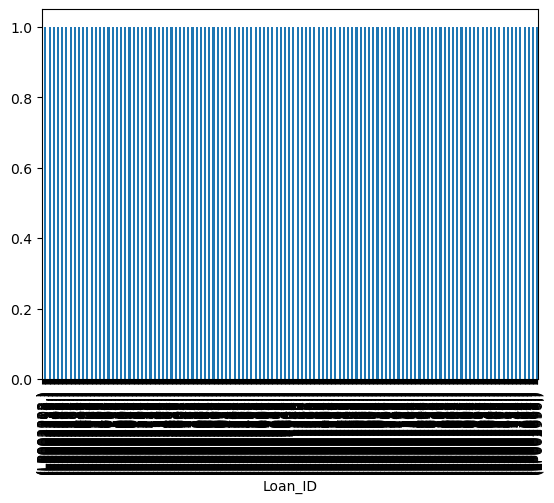

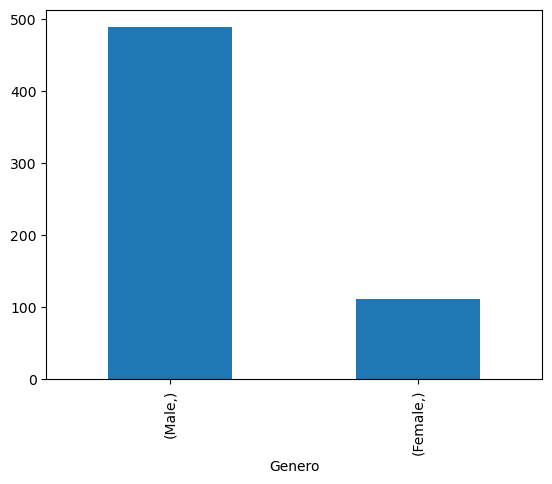

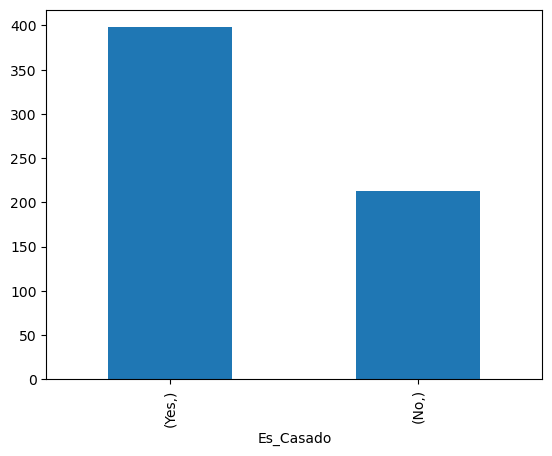

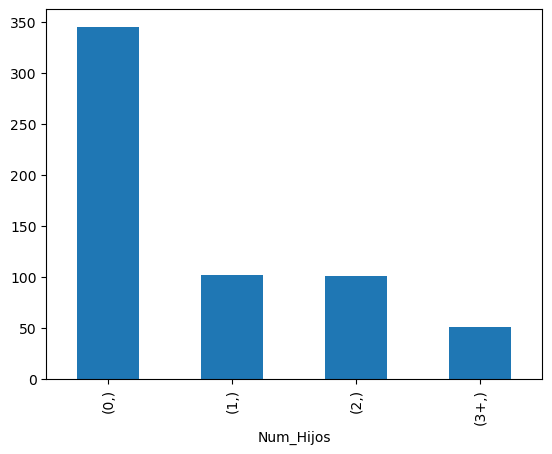

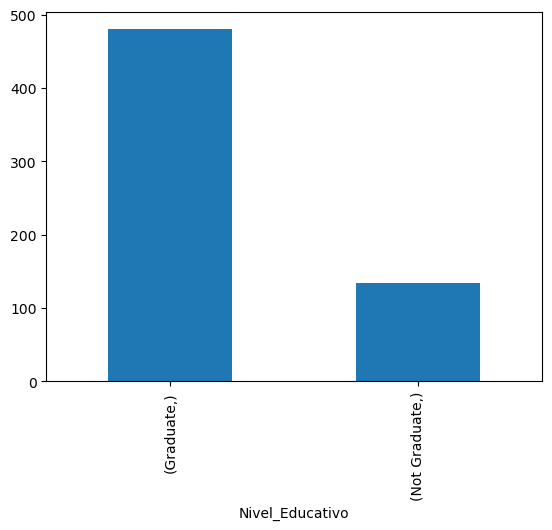

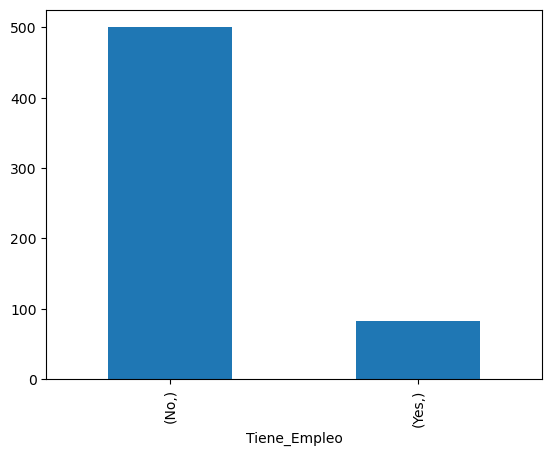

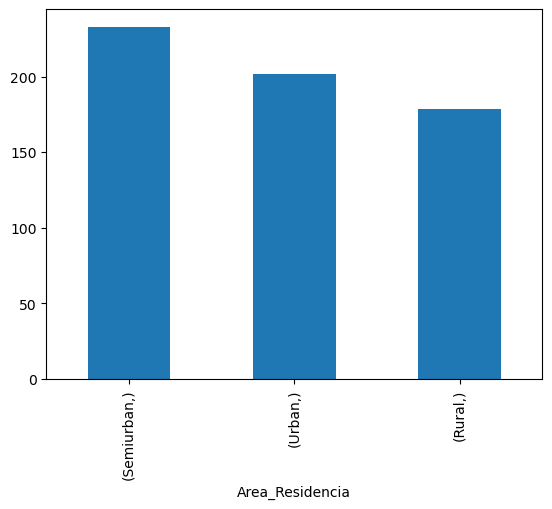

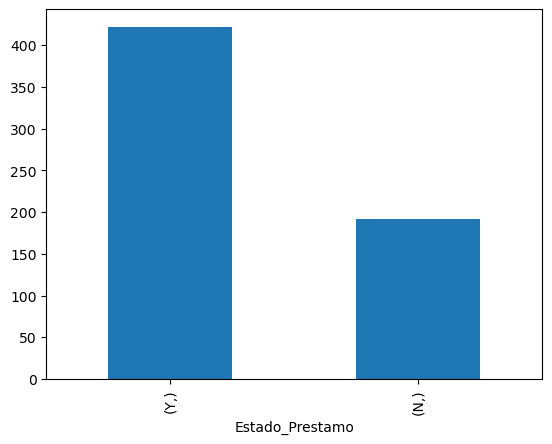

In [29]:
# realizamos diagramas de barras para revisar la distribución de frecuencias de cada variable cualitativa
for var in lista_cualitativas:
    df_train[[var]].value_counts().plot.bar()
    plt.show()

En este punto debemos revisar las variables que solo tengan una categoría relevante y cuestionar si dejarlas o no para continuar nuestros análisis.

### Relación con variables numéricas


In [30]:
# Correlación entre columnas numéricas

def tidy_corr_matrix(corr_mat):
  '''
  Función para convertir una matrix de correlación de pandas en formato tidy

  '''
  corr_mat=corr_mat.stack().reset_index()
  corr_mat.columns = ['variable_1','variable_2','r']
  corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
  corr_mat['abs_r'] = np.abs(corr_mat['r'])
  corr_mat = corr_mat.sort_values('abs_r', ascending=False)

  return(corr_mat)

In [31]:
corr_matrix = df_train.select_dtypes(include=['float64','int64']).corr(method='pearson')
tidy_corr_matrix(corr_matrix)  #.head(10)

,variable_1,variable_2,r,abs_r
10,Mto_Prestamo,Ing_Depen,0.570909,0.570909
2,Ing_Depen,Mto_Prestamo,0.570909,0.570909
7,Ing_Indepen,Mto_Prestamo,0.188619,0.188619
11,Mto_Prestamo,Ing_Indepen,0.188619,0.188619
1,Ing_Depen,Ing_Indepen,-0.116605,0.116605
5,Ing_Indepen,Ing_Depen,-0.116605,0.116605
8,Ing_Indepen,Termino_Prestamo,-0.059878,0.059878
16,Termino_Prestamo,Ing_Indepen,-0.059878,0.059878
15,Termino_Prestamo,Ing_Depen,-0.045306,0.045306
3,Ing_Depen,Termino_Prestamo,-0.045306,0.045306


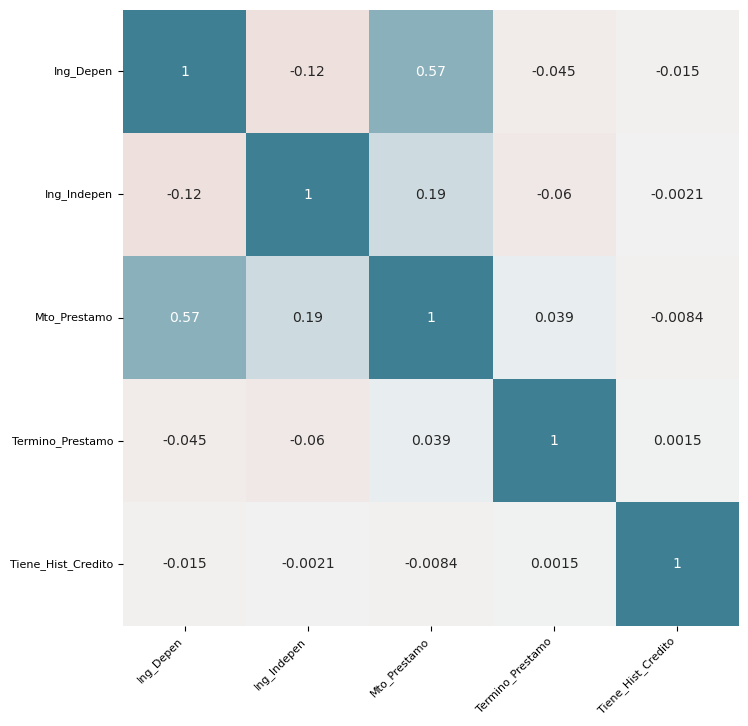

In [32]:
# Heatmap matriz de correlaciones
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot     =  True,
    cbar      =  False,
    annot_kws = {"size":10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = ax

)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

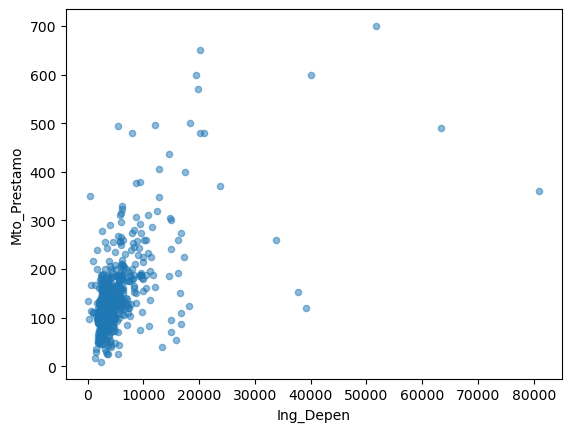

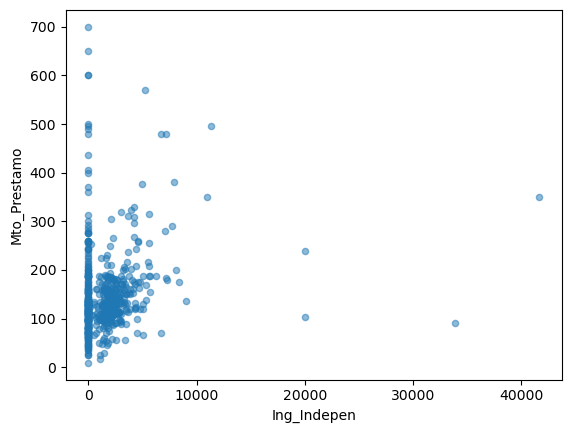

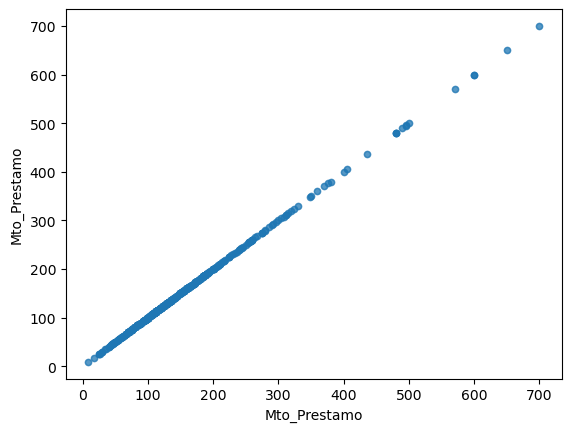

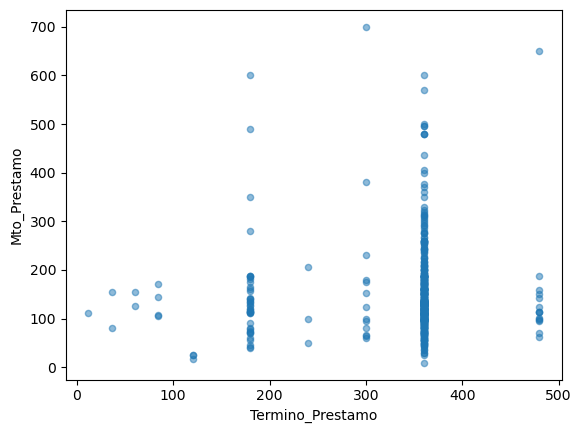

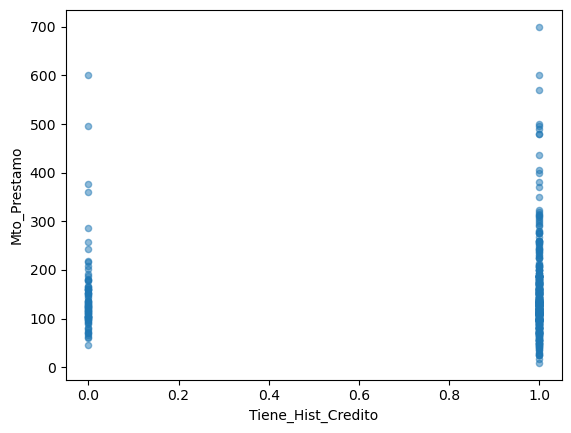

In [33]:
# Diagrama de dispersión cada variable con la variable objetivo (Estado_Prestamo):

lista_cuantitativas = list(df_train.describe().columns)
for var in lista_cuantitativas:
    data = pd.concat([df_train['Mto_Prestamo'], df_train[var]], axis=1)
    data.plot.scatter(x=var, y='Mto_Prestamo', alpha = 0.5)
    plt.show()

**¿Qué podemos ver en estos gráficos?**
   * Relaciones entre la variable cuantitativa de interés con cada una de las demás, además de su coeficiente de correlación.
   * Si hay varialbes relacionadas donde haya riesgo con alguno de los extremos, lo que podría llevar a eliminarla.
   * Eliminar variables poco correlacionadas para descartarlas.
   * Si vemos una relación con una variable discreta podemos revisarla con el siguiente gráfico para más detalle.

## Relación de variables cuantitativas con variable categóricas

Sirve para variables Target u objetivo cuantitativas y cualitativa

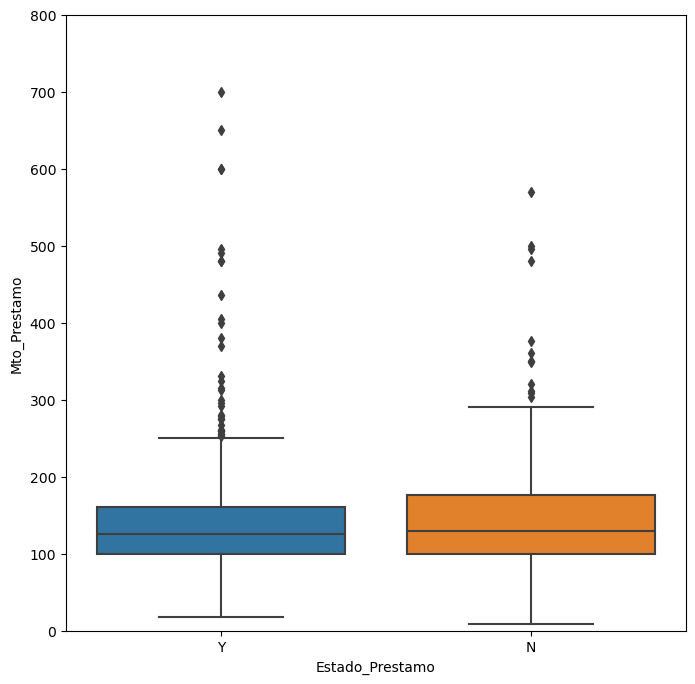

In [34]:
# Diagrama de cajas Estado_Prestamo/Mto_Prestamo:

var = 'Estado_Prestamo'
data = pd.concat([df_train['Mto_Prestamo'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8,8))
fig = sns.boxplot(x=var, y="Mto_Prestamo", data=data)
fig.axis(ymin=0, ymax=800)
plt.show()

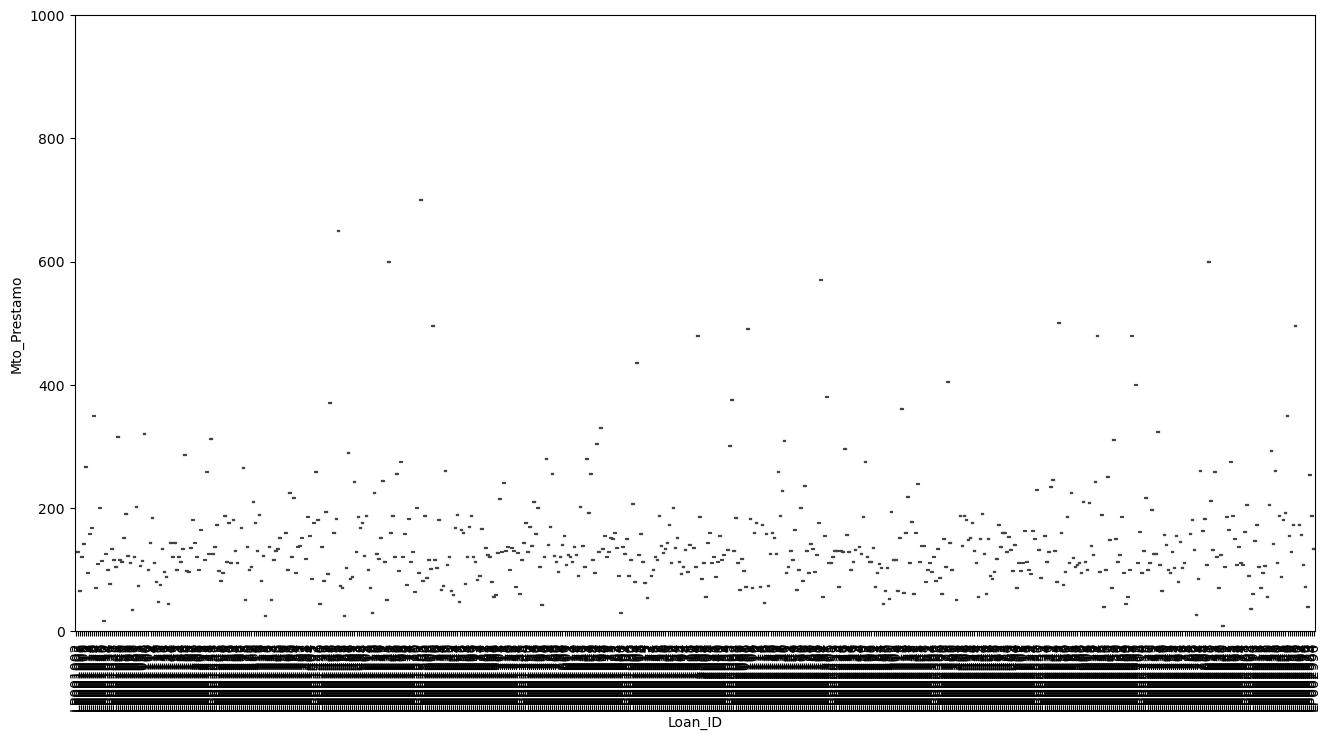

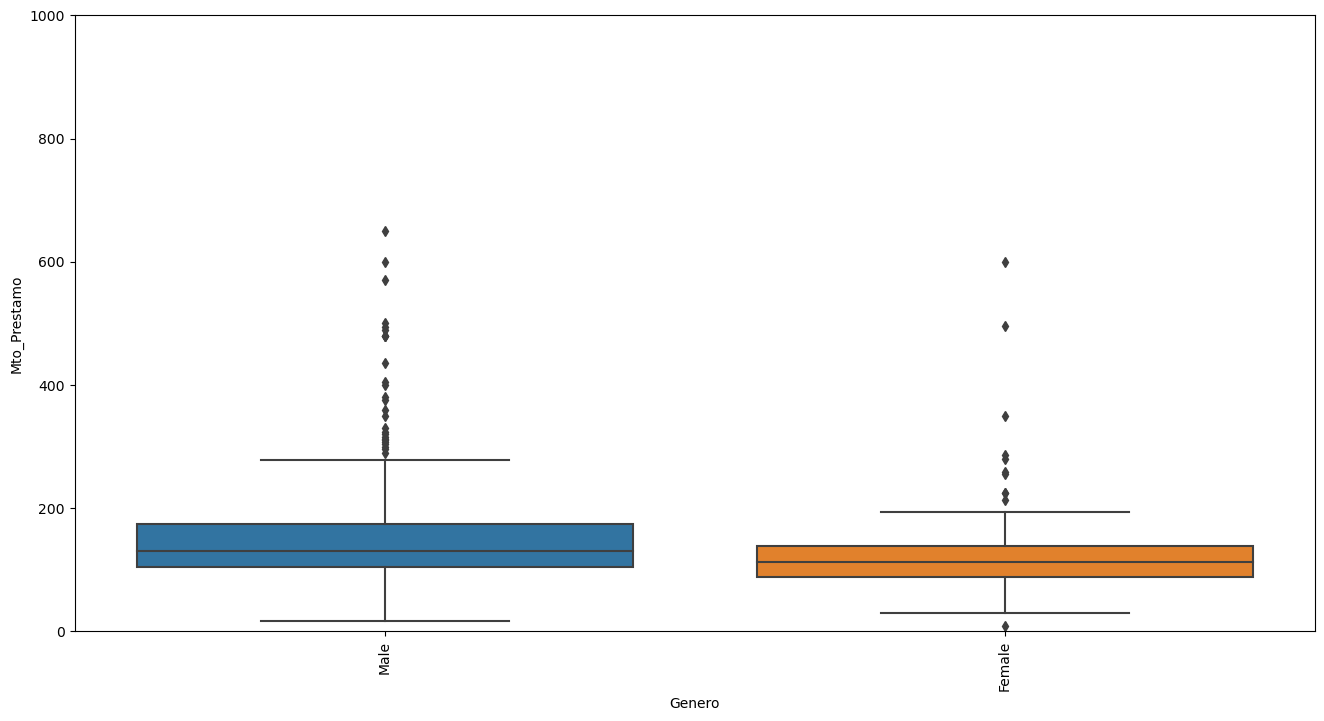

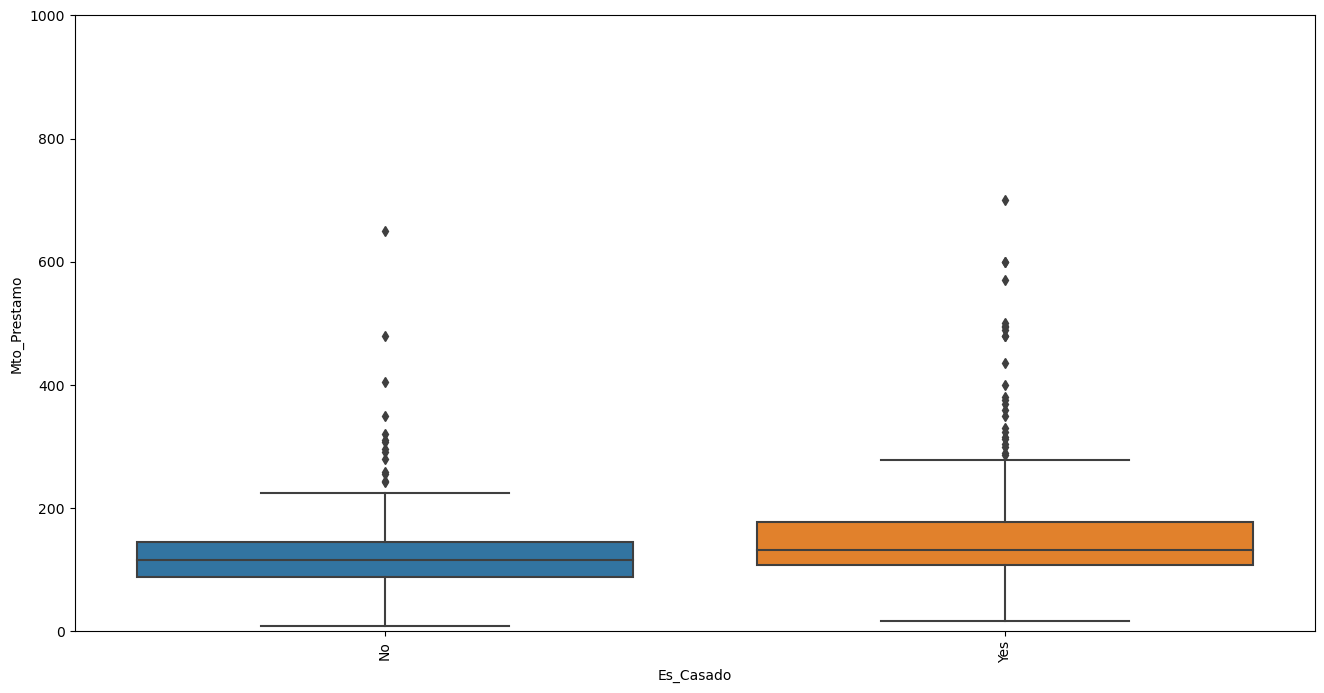

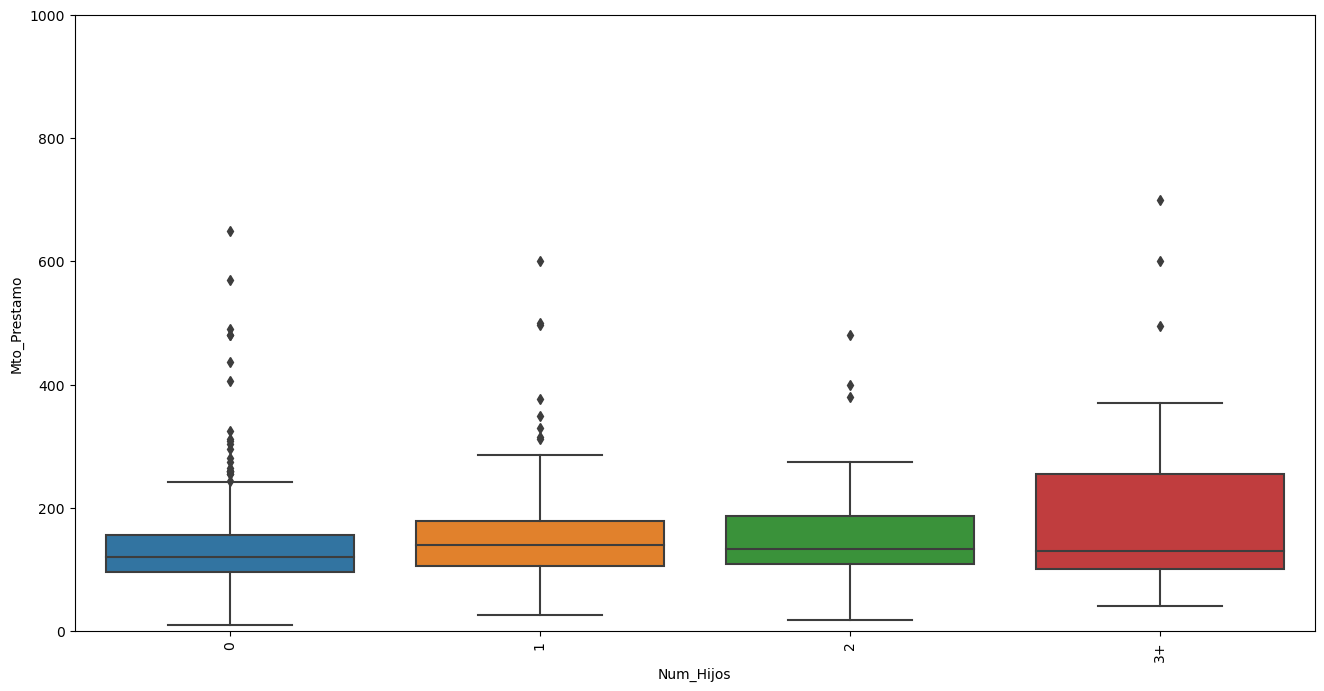

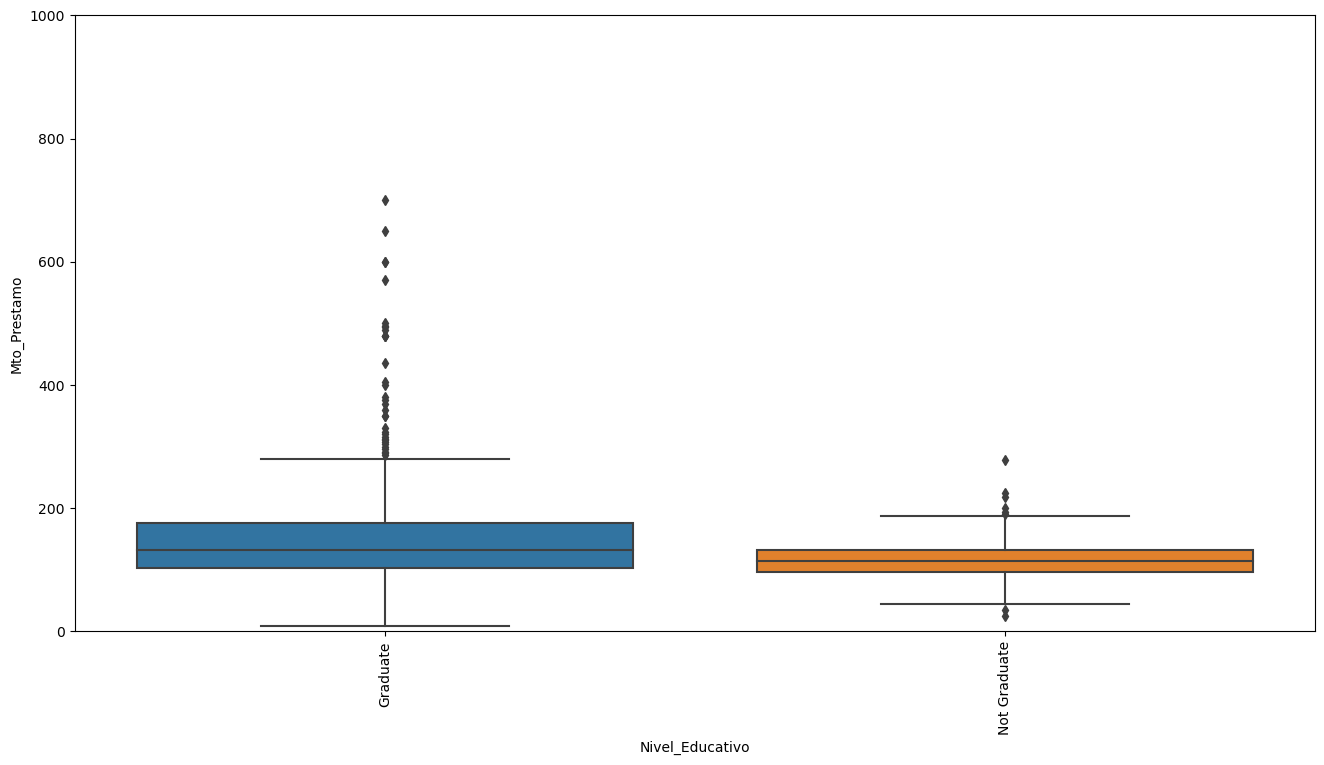

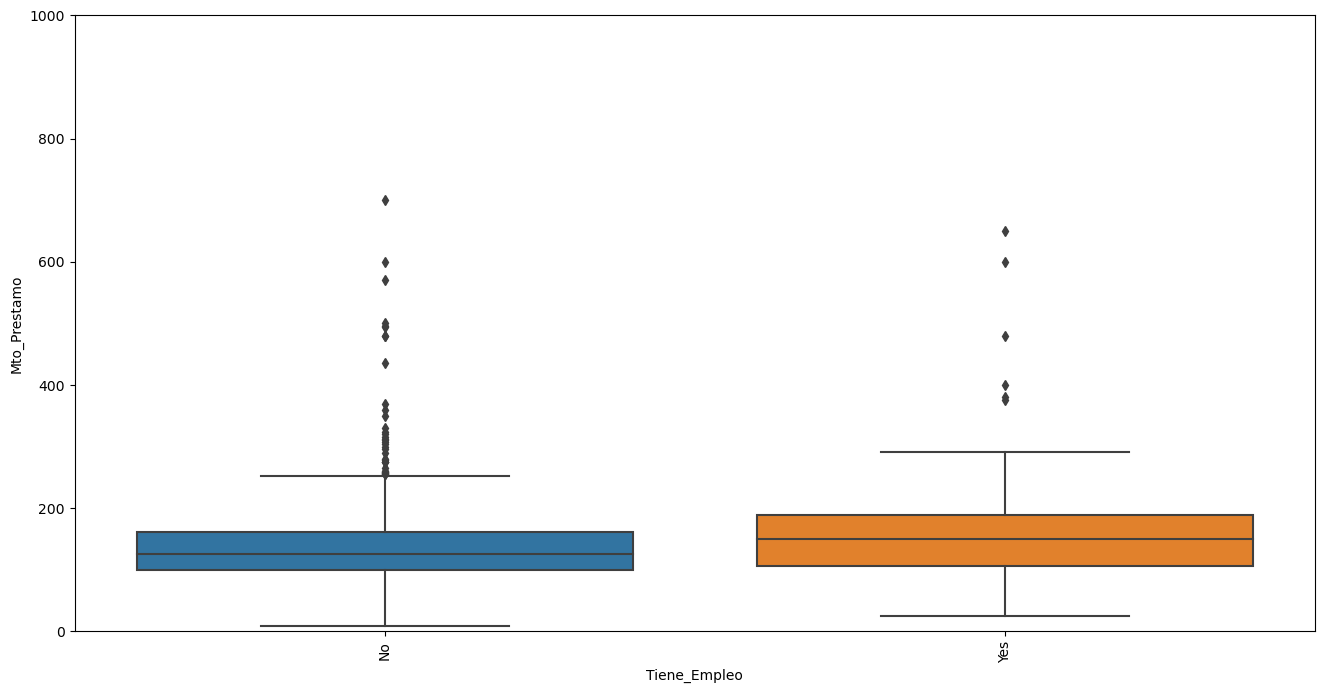

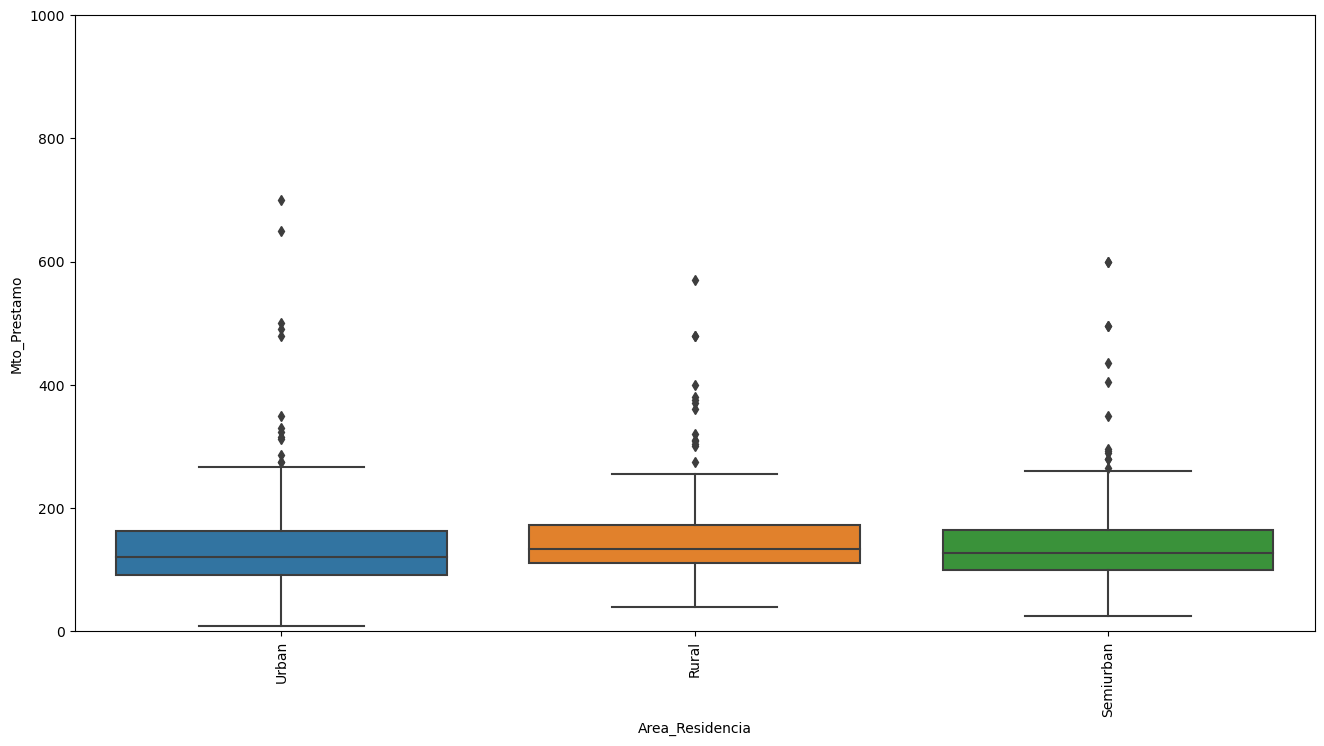

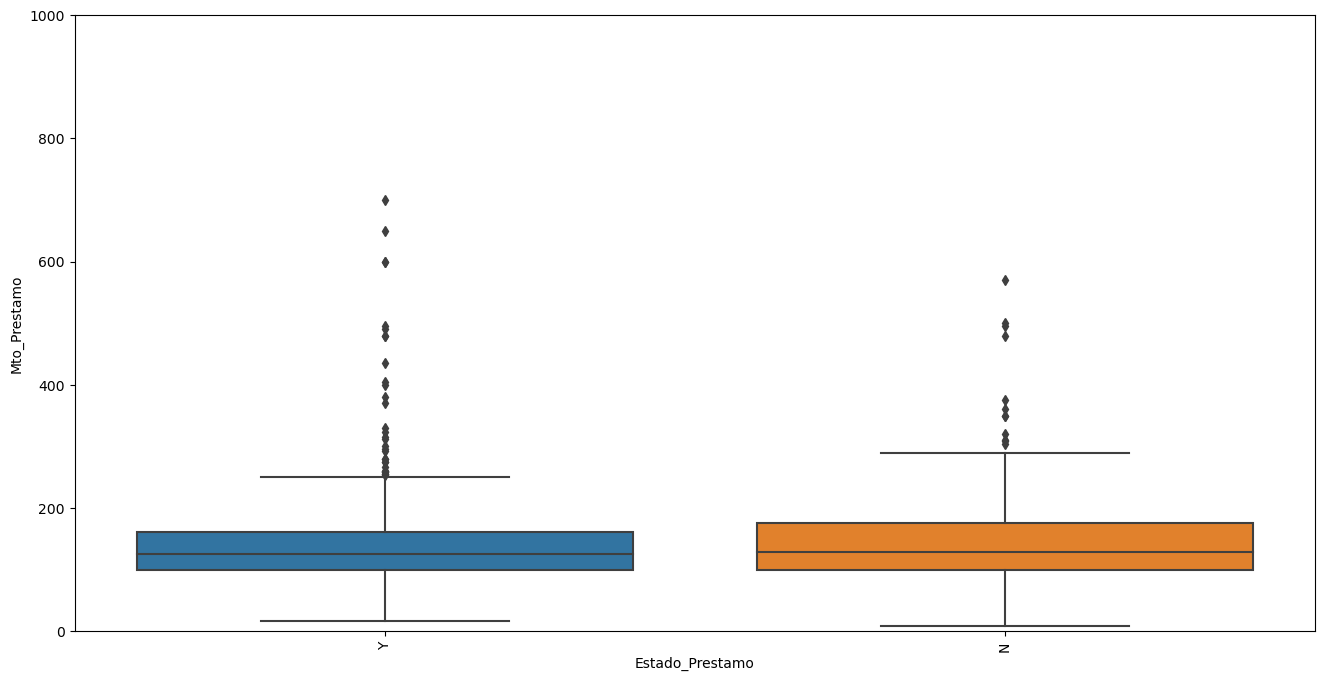

In [35]:
# Diagrama de cajas RoofMatl/saleprice:
for var in lista_cualitativas:
    data = pd.concat([df_train['Mto_Prestamo'], df_train[var]], axis=1)
    f, ax = plt.subplots(figsize=(16, 8))
    fig = sns.boxplot(x=var, y="Mto_Prestamo", data=data)
    fig.axis(ymin=0, ymax=1000)
    plt.xticks(rotation=90)
    plt.show()

## Relación de variables categóricas o cualitativas

Sirve para variables Target caulitativa

In [36]:
pd.crosstab(df_train['Estado_Prestamo'],df_train['Area_Residencia'])

Area_Residencia,Rural,Semiurban,Urban
Estado_Prestamo,,,
N,69,54,69
Y,110,179,133


In [37]:
cruce = pd.crosstab(df_train['Estado_Prestamo'],df_train['Area_Residencia'],margins = True, normalize= 'index')
cruce

Area_Residencia,Rural,Semiurban,Urban
Estado_Prestamo,,,
N,0.359375,0.281250,0.359375
Y,0.260664,0.424171,0.315166
All,0.291531,0.379479,0.328990


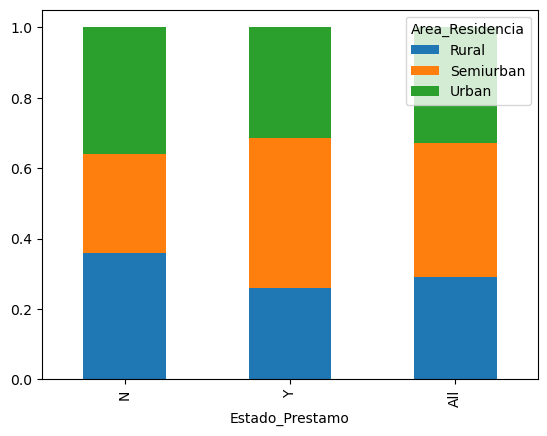

In [38]:
cruce.plot.bar(stacked = True)
plt.show()

## ETAPA 4: Casos Atípicos Univariados y Multivariados

### Limpieza de datos


<b>Datos desaparecidos</b>

Antes de tratar los datos faltantes, es importante determinar su prevalencia y su aleatoriedad, ya que pueden implicar una reducción del tamaño de la muestra. También hay que asegurarse que la gestión de los datos desaparecidos no está sesgada o esconda una verdad incómoda.

In [39]:
df_train.isnull()

,Loan_ID,Genero,Es_Casado,Num_Hijos,Nivel_Educativo,Tiene_Empleo,Ing_Depen,Ing_Indepen,Mto_Prestamo,Termino_Prestamo,Tiene_Hist_Credito,Area_Residencia,Estado_Prestamo
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [40]:
df_train.isnull().sum()

Loan_ID                0
Genero                13
Es_Casado              3
Num_Hijos             15
Nivel_Educativo        0
Tiene_Empleo          32
Ing_Depen              0
Ing_Indepen            0
Mto_Prestamo          22
Termino_Prestamo      14
Tiene_Hist_Credito    50
Area_Residencia        0
Estado_Prestamo        0
dtype: int64

In [41]:
#Mising data:

total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
Tiene_Hist_Credito,50,0.081433
Tiene_Empleo,32,0.052117
Mto_Prestamo,22,0.035831
Num_Hijos,15,0.024430
Termino_Prestamo,14,0.022801
Genero,13,0.021173
Es_Casado,3,0.004886
Loan_ID,0,0.000000
Nivel_Educativo,0,0.000000
Ing_Depen,0,0.000000


Vamos hacer 3 procesos de imputacion rapida:

1.- En la variable "Tiene_Hist_Credito", imputaremos con la clase de mayor frecuencia

2.- En la variable "Mto_Prestamo", imputaremos con valores al azar de la misma información

3.- En la variable "Termino_Prestamo", imputaremos la mediana de los datos

In [42]:
# Tratamiento de datos faltantes:
##--Tiene_Hist_Credito
print(df_train.Tiene_Hist_Credito)
print("-----------------------------------")
print(df_train.Tiene_Hist_Credito.value_counts(dropna=False))

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Tiene_Hist_Credito, Length: 614, dtype: float64
-----------------------------------
1.0    475
0.0     89
NaN     50
Name: Tiene_Hist_Credito, dtype: int64


In [43]:
df_train.Tiene_Hist_Credito=df_train.Tiene_Hist_Credito.fillna(1) ##fillna reemplaza el valor vacio por escalar 
print(df_train.Tiene_Hist_Credito.value_counts(dropna=False))

1.0    525
0.0     89
Name: Tiene_Hist_Credito, dtype: int64


In [44]:
##--Mto_Prestamo
df_train.Mto_Prestamo

0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: Mto_Prestamo, Length: 614, dtype: float64

In [45]:
##--Mto_Prestamo
df_train.Mto_Prestamo

0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: Mto_Prestamo, Length: 614, dtype: float64

In [51]:
df_train.Mto_Prestamo.describe()


count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: Mto_Prestamo, dtype: float64

In [52]:

np.random.choice(df_train.Mto_Prestamo.dropna(),22,replace = True)

array([130.,  95., 187.,  96., 104., 118.,  80., 360.,  73., 188., 143.,
       200., 113., 260., 120.,  96., 110., 200., 172., 135., 100., 135.])

Como realizar el reemplazo en la variable?

In [53]:
##--Termino_Prestamo
# Como seria el proceso?

In [54]:
df_train['Termino_Prestamo'].median()

360.0

In [55]:
df_train['Termino_Prestamo'] = df_train['Termino_Prestamo'].fillna(df_train['Termino_Prestamo'].median())

In [56]:
df_train['Termino_Prestamo'].describe()

count    614.000000
mean     342.410423
std       64.428629
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Termino_Prestamo, dtype: float64

In [57]:
##--Monto de prestamo
# Como seria el proceso?

<Axes: ylabel='Mto_Prestamo'>

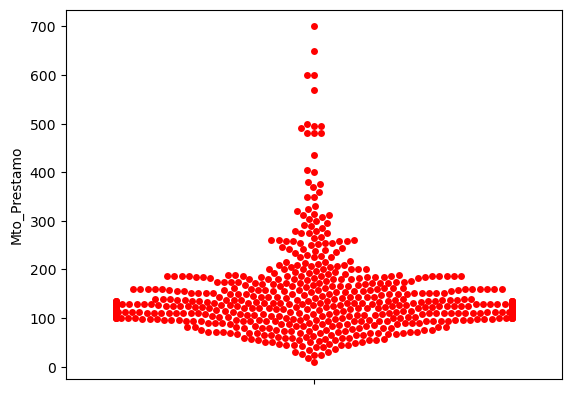

In [58]:
sns.swarmplot(y=df_train["Mto_Prestamo"],color='red')